<a href="https://colab.research.google.com/github/adityasengar/ML/blob/main/BAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
bstart=300 #starting budget
bend=3400 #end budget
bstep=200 #step increment in budget
max_iter=25 #maximum iterations to visualize for the access probability vs iteration graph
threshold = 0.000000001 #threshold
vnode=[26,28,30,32,34,36,40,51,52,53,54] #All nodes where countermeasures can be applied
cost=[100,200,1000,300,700,500,400,200,300,1200,1300] #budgets of all nodes


#The BAG consists for 55 nodes. A variable called type is defined that lists the type of node
#Initialise the BAG based on the description in the manuscript
nodes=55
type = ['d']*nodes # 'd' for diamond, 'c' for circle, 'l' for lead (rectangles)
type[1]=type[3]=type[5]=type[7]=type[9]=type[11]=type[13]=type[15]=type[17]=type[19]=type[22]=type[24]='c'
type[44]=type[45]=type[46]=type[47]=type[48]=type[49]=type[50]='c'
for i in range(25,44):
  type[i]='l'
for i in range(51,nodes):
  type[i]='l'

parent=[0]*nodes #This variable will track all the parents of a node
prob=[0]*nodes

#Define all the parents of each node. Leaf nodes have no parent, circle and diamond nodes only have parents
parent[0]=-1 #for the starting node, there is no parent
parent[1]=[[0,25]]
parent[2]=[1,45]
parent[3]=[[2,26,51]]
parent[4]=[3]
parent[5]=[[4,39]]
parent[6]=[7]
parent[7]=[[8,28,52]]
parent[8]=[9,47]
parent[9]=[[0,27]]
parent[10]=[5,44,46,48]
parent[11]=[[10,30,53]]
parent[12]=[11]
parent[13]=[[12,31]]
parent[14]=[15]
parent[15]=[[16,32]]
parent[16]=[17]
parent[17]=[[18,33]]
parent[18]=[19]
parent[19]=[[20,34,54]]
parent[20]=[13,49,50]
parent[21]=[22]
parent[22]=[[23,36]]
parent[23]=[24]
parent[24]=[[18,35]]
parent[44]=[[18,43]]
parent[45]=[[12,37]]
parent[46]=[[6,29]]
parent[47]=[[12,38]]
parent[48]=[[0,40]]
parent[49]=[[14,42]]
parent[50]=[[21,41]]

import random

#generate an initial probability values for the starting nodes (only circles and diamonds)
random.seed(16)
for i in range(0,nodes):
  prob[i]=random.random()

#For the leaf nodes, the probability values stays constant. If the leaf node is a CVSS vulnerability, the probability i estiamted using CVSS 3.1 scores, foor other leaf nodes, a rough guess is made based on previous works
#Initially, the non-lead nodes 1, 26 are assigned a value of prob=1, other other non-lead nodes have initial value 0.
#Note that index 0 represents node 1, index 1: node 2 and so on...
prob[0]=1.0
prob[25]=1.0
prob[26]=0.7294
prob[27]=1.0
prob[28]=0.7294
prob[29]=0.8
prob[30]=1.0
prob[31]=0.9
prob[33]=0.9
prob[34]=0.7294
prob[35]=0.9
prob[36]=1.0
prob[37]=0.8
prob[38]=0.8
prob[39]=0.9
prob[40]=0.7294
prob[41]=0.9
prob[42]=0.9
prob[43]=0.7
prob[51]=0.729
prob[52]=0.472
prob[53]=0.729
prob[54]=0.729
print(prob)

[1.0, 0.480480665601294, 0.4169526266056648, 0.4467592537839232, 0.40951572994989616, 0.6577058263942708, 0.2588553818900783, 0.6349959241034842, 0.010128373627344978, 0.3020437047996458, 0.335063350697719, 0.14195051753283405, 0.7434142500319177, 0.3101082520349453, 0.7892419935789009, 0.9562050372570121, 0.25350600496212594, 0.8935407039073096, 0.8076368242952832, 0.6674189689081609, 0.02736935365743165, 0.45678832828020677, 0.6267487533654431, 0.2962256519901001, 0.22433551238962557, 1.0, 0.7294, 1.0, 0.7294, 0.8, 1.0, 0.9, 0.2930219961610101, 0.9, 0.7294, 0.9, 1.0, 0.8, 0.8, 0.9, 0.7294, 0.9, 0.9, 0.7, 0.7278824586405982, 0.01306777779111723, 0.8424283777497127, 0.49153192351749475, 0.9187654021373827, 0.47507822289317714, 0.7957382807354629, 0.729, 0.472, 0.729, 0.729]


0.8157887870726295


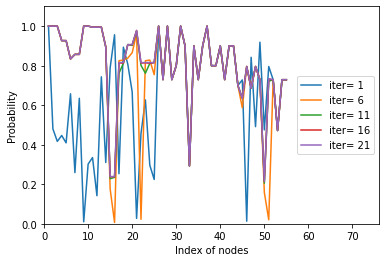

<built-in function iter>


In [ ]:
#Iterative protocol that runs the combinational logic algorithm proposed by Matthews.
store1=[]
#riskcalc is the function that takes as input P (the array of nodes where contermeasure has to be applied), and performs the combinational logic algorithm
#To run a normal risk assessment without countermeasures, assing P=[]

def riskcalc(P):

  probi=prob[:]

  #For all nodes where countermeasure is applied, set probability to 0
  for i in range(0,len(P)):
    probi[P[i]]=0

  flag = [0]*nodes #keeps track of whether a node has been traversed before or not
  it=1
  error=[] #array whose index j stores the mean-squared error between probability of node i at itertion j-1 and node i and iteration j
  store=[probi[:]] #stores the initial probability of all nodes

  #Start the algorithm that performs the iterative combinatorial method
  k=0

  while it != 0:

    for i in range(0,nodes):#Starting node does not have parent and its probability always remains constant
      if parent[i]==-1:
        continue

      if type[i]=='c':#Calculate probability of circle node based on parent node probability
        if len(parent[i][0])==2:
          probi[i]=probi[parent[i][0][0]]*probi[parent[i][0][1]]
        elif len(parent[i][0])==3:
          probi[i]=probi[parent[i][0][0]]*(1-(1-probi[parent[i][0][1]])*(1-probi[parent[i][0][2]]))

      if type[i]=='d':#Calculate probability of diamond node based on parent node probability
        prod=1
        for j in range(0,len(parent[i])):
          prod=prod*(1-probi[parent[i][j]])
        probi[i]=1-prod


      if type[i]=='l':#Probability of lead nodes stays constant
        continue

    store.append(probi[:])#Append the new probability of the BAG in store array
    LEN=len(store)
    t1=store[LEN-1][:]
    t2=store[LEN-2][:]
    sumi=0.0
    for i in range(0,len(probi)):#Calculate the mean-squared error between node probability with previous iteration
      sumi+=(t1[i]-t2[i])*(t1[i]-t2[i])
    error.append(sumi)

    #if the error is below a threshold, that means BAG has attained has attained a steady state value (i.e. all nodes have achieved their steady values), end the iteative protocol now
    if(error[len(error)-1]<threshold):
      it=0
      return(probi[16],store) #When iteration stops, return the access probability of node: Access the database server

#Perform the above logic over 2 examples, first where nodes 27,29,33,37 have countermeasures applied; second where no counteremeasures exist
print(riskcalc([])[0])
#print the probability values at different iterations. Used to make Figure 7
ra=[i+1 for i in range(0,nodes)]

import matplotlib.pyplot as plt
store=riskcalc([])[1]
for i in range(0,max_iter,5):
  plt.plot(ra,store[i],label='iter= %d'%(i+1))
plt.legend(loc='center right')
plt.xlim(0, 76)
plt.ylim(0,1.1)
plt.xlabel('Index of nodes')
plt.ylabel('Probability')
plt.show()
print (iter)

In [ ]:
#This function sorts the plan in decreasing order of the cost.
#V is the list of nodes, C is the list of cost of nodes
def sorter(V,C,budget):
  import numpy
  arrange=numpy.argsort(C).tolist() #arrange cost list in ascending order
  arrange.reverse() #reverse the cost list
  newplan2=V[:]
  newcost2=C[:]

  for i in range(0,len(V)):
    newplan2[i]=V[arrange[i]]
    newcost2[i]=C[arrange[i]]
  sum1=budget
  c=0 #c stores the number of nodes that have to be subtracted from the newplan so that it falls within budget

  for i in range(0,len(newcost2)):
    if sum(newcost2[i:len(newcost2)])<=budget:
      break
    else:
      c=c+1

  return(newplan2,newcost2,c)

#-----------------------------------------------------------------------------------

#This patch of code just returns the relevant countermeasure based on the node value
#For ex: if output plan from previous protocol is {26,28}, the function outputs {C1,C2}
def conv(A):
  aa=A[:]
  for q in range(0,len(A)):
    if A[q]==26:
      aa[q]='C1'
      continue
    if A[q]==28:
      aa[q]='C2'
      continue
    if A[q]==30:
      aa[q]='C3'
      continue
    if A[q]==32:
      aa[q]='C4'
      continue
    if A[q]==34:
      aa[q]='C5'
      continue
    if A[q]==36:
      aa[q]='C6'
      continue
    if A[q]==40:
      aa[q]='C7'
      continue
    if A[q]==51:
      aa[q]='C8'
      continue
    if A[q]==52:
      aa[q]='C9'
      continue
    if A[q]==53:
      aa[q]='C10'
      continue
    if A[q]==54:
      aa[q]='C11'
      continue
  return(aa)


In [ ]:
#Perform countermeasure selection plan based on (Stan, 2019) using A* algorithm
#The algorithm takes "budget" as the input parameter and calculates risk of accessing database server
def bud(budget,vnode,cost):
  #We perform A* algorithm where the set of CM are submitted in 2 ways. Normally or in reverese order.

  if reverse==1:
    vnode.reverse()
    cost.reverse()

  import time
  start_time = time.time()#Start the clock

  OL=[]#Priority Open list (refer to manuscript)
  CL=[]#Closed list (refer to manuscript)
  OLcost=[]#Priority cost list that stores the cost of each node in the open list
  OL.append(vnode) #Update OL with the initial set of CM set
  OLcost.append(cost)#Update OLcost with the initial cost set
  FX=[0] #Stores the heuristic f(x) = h(x) + g(x)
  flag=1
  I=0
  while flag==1:
    plan=OL[I] #take the element from OL that is the next in the priority queue
    cost=OLcost[I]
    sumi=0
    for i in range(0,len(plan)):#estimate the cost of the plan
      sumi+=cost[i]
    if sumi<=budget: #Return the plan if cost of implementing the plan is less than or equal to our budget
      flag=1
      print('eureka. Plan found: ', conv(plan))
      break
    CL.append(plan) #If plan is unsuccessful, store it in the closed list

    for k in range(0,len(plan)): #Remove one countermeasure from the current plan, and estimate the f(x) heuristic
      newplan=plan[0:k]+plan[k+1:len(plan)]
      newcost=cost[0:k]+cost[k+1:len(cost)]

      if (newplan not in OL) and (newplan not in CL):
        gx=riskcalc(newplan)[0] #g(x) is the risk when one countermeasure is removed form current plan
        newplan2,newcost2,rem=sorter(newplan,newcost,budget) #Sort the new plan in a descending order or their cost. rem measures the minimum number of nodes that have to be subtrated from the plan to fall within budget

        risk=[]
        for l in range(len(newplan2)): #calculation of heuristic h(x)
          newplan3=newplan2[0:l]+newplan2[l+1:len(newplan2)]
          newcost3=newcost2[0:l]+newcost2[l+1:len(newcost2)]
          risk.append(riskcalc(newplan3)[0]-gx)
        if(rem==len(newplan2)):
          continue
        hx= risk[rem:len(newplan2)][0]
        fx=hx+gx

        #print('fx:',fx)

        #Update OL, FX and OLcost based on the f(x) parameter.
        if len(FX)==1:
          FX.append(fx)
          OL.append(newplan)
          OLcost.append(newcost)

        else:
          for i in range(1,len(FX)):
            if i==len(FX)-1:
              FX.append(fx)
              OL.append(newplan)
              OLcost.append(newcost)

              continue
            if fx>FX[i+1] and fx<FX[i]:
              FX.insert(i+1,fx)
              OL.insert(i+1,newplan)
              OLcost.insert(i+1,newcost)

    I=I+1
    #If the OL list is exhausted, return: no budget found
    if len(OL)==I:
      print('No budget found')
      break
  #Print the time of running the algorithm and the risk of BAG
  print("--- %s seconds ---" % (time.time() - start_time))
  temp1=budget
  temp2=riskcalc(plan)[0]
  temp3=plan
  temp4=(time.time() - start_time)
  print('Budget:', temp1,'Risk:',temp2)
  return(temp1,temp2,temp3,temp4)
  print('------------------------------------------------')


tempbudget=[]
temprisk=[]
tempplan=[]
temptime=[]
#run iteration over multiple budgets
for B in range(bstart,bend,bstep):
  reverse=0
  estimate=bud(B,vnode,cost)
  tempbudget.append(estimate[0])
  temprisk.append(estimate[1])
  tempplan.append(estimate[2])
  temptime.append(estimate[3])

tempbudgetr=[]
tempriskr=[]
tempplanr=[]
temptimer=[]
for B in range(bstart,bend,bstep):
  reverse=1
  estimate=bud(B,vnode,cost)
  tempbudgetr.append(estimate[0])
  tempriskr.append(estimate[1])
  tempplanr.append(estimate[2])
  temptimer.append(estimate[3])


for i in range(0,len(temprisk)):
  temprisk[i]=temprisk[i]*100

for i in range(0,len(tempriskr)):
  tempriskr[i]=tempriskr[i]*100

import matplotlib.pyplot as plt
plt.plot(tempbudget,temprisk,label='Risk (f)')
plt.plot(tempbudgetr,tempriskr,label='Risk (r)')
plt.legend(loc='center right')
plt.xlabel('Budget')
plt.ylabel('Risk (%)')
plt.show()



plt.plot(tempbudget,temptime,label='Time (f)')
plt.plot(tempbudgetr,temptimer,label='Time (r)')
plt.legend(loc='center right')
plt.xlabel('Budget')
plt.ylabel('Time of fining risk (%)')
plt.show()



eureka. Plan found:  ['C1', 'C8']
--- 29.76893901824951 seconds ---
Budget: 300 Risk: 0.81130997650067
eureka. Plan found:  ['C9']
--- 29.67162275314331 seconds ---
Budget: 500 Risk: 0.8155056914277656
eureka. Plan found:  ['C9']
--- 27.750614881515503 seconds ---
Budget: 700 Risk: 0.8155056914277656
eureka. Plan found:  ['C1', 'C6', 'C9']
--- 26.497087955474854 seconds ---
Budget: 900 Risk: 0.7576944163582379
eureka. Plan found:  ['C4', 'C7']
--- 22.99893093109131 seconds ---
Budget: 1100 Risk: 0.8071933912555918
eureka. Plan found:  ['C1', 'C6', 'C7', 'C8']
--- 21.762409687042236 seconds ---
Budget: 1300 Risk: 0.6729053839364935
eureka. Plan found:  ['C3', 'C6']
--- 18.573009967803955 seconds ---
Budget: 1500 Risk: 0.5881396016596828


KeyboardInterrupt: ignored

In [ ]:
#Based on my initial simulations, these are the values recorded. this data is used to create Figures 8 and 9

#Time array
time=[100,200,300,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,3200,3400,3600,3800,4000]

#Forward and reverse risk array
riskf=[0.815,0.815,0.811,0.811,0.811,0.811,0.811,0.763,0.763,0.63,0.63,0.63,0.63,0.55,0.53,0.35,0.51,0.51,0.51,0.51,0.4,0.33,0.00012,0.00012,0]
riskr=[0.815,0.815,0.815,0.815,0.815,0.806,0.76,0.76,0.63,0.63,0.63,0.593,0.593,0.593,0.593,0.593,0.00012,0.00012,0.00012,0.00015,0.00015,0.00015,0.0001,0,0]

#Convert risk fraction to percentage
riskf=[100*i for i in riskf]
riskr=[100*i for i in riskr]

#Time of computation (in seconds)
timef=[24,25.5,22.4,22,21.52,21.36,21.3,17.6,16.8,12.88,12.88,12.88,12.75,11.07,11.04,5.42,4.85,4.85,4.85,4.85,2.2,2.13,1.7,1.7,1.6]
timer=[28,25,22,21.4,21.2,20.9,14.4,14.4,12.5,12.5,12.5,9,8.8,8.8,8.8,8.8,6.1,6.1,6,2.5,2.5,2.5,1.5,0.9,0.9]
import matplotlib.pyplot as plt

